In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML


TRAIN_CSV = './data/training.csv'
print ("Hello World .. ")

td = pd.read_csv(TRAIN_CSV)

print (list(td))
print (td.shape)

print ("Bye World .. ")

Hello World .. 
['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']
(250000, 33)
Bye World .. 


In [81]:
td.shape[1]
print (td.DER_lep_eta_centrality.describe())
print (np.mean(td.DER_lep_eta_centrality))
print (np.std(td.DER_lep_eta_centrality))
#td.DER_lep_eta_centrality.std

count    250000.000000
mean       -708.985189
std         453.596721
min        -999.000000
25%        -999.000000
50%        -999.000000
75%           0.000000
max           1.000000
Name: DER_lep_eta_centrality, dtype: float64
-708.985189132
453.595814008


1
DER_mass_MMC


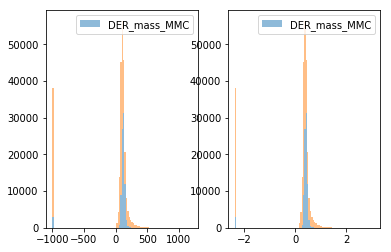

2
DER_mass_transverse_met_lep


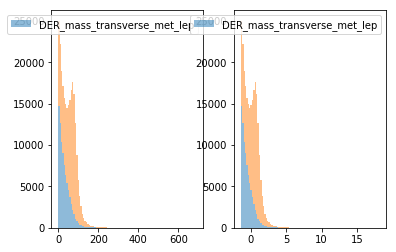

In [83]:
"""
Data Columns
['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi',
 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']
 """

num_features = td.shape[1]
num_features = 5
#plt.figure()
#plt.subplots (num_features-2, 2)

for f in np.arange(1,num_features-2):
    #plt.subplot (num_features-2,2,f*2-1)
    plt.figure()
    plt.subplot(1,2,1)
    
    feature = list(td)[f]
    print (f)
    print (feature)
    mean = np.mean(td[feature])
    std = np.std(td[feature])
    plt.hist([td[feature][td.Label == 's'], td[feature][td.Label == 'b']], \
                 bins=100, alpha=0.5, stacked=True, label=feature);
    plt.legend(loc='upper right')
    
    plt.subplot(1,2,2)
    plt.hist([(td[feature][td.Label == 's'] - mean)/std, (td[feature][td.Label == 'b'] - mean)/std], \
                 bins=100, alpha=0.5, stacked=True, label=feature);
    plt.legend(loc='upper right')
    
    
    plt.show()
#plt.show();

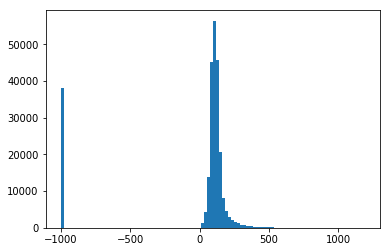

In [23]:
plt.cla();
plt.hist(td.DER_mass_MMC, bins=100)
plt.show();